# Treinamento de Redes Neurais Profunda

Aluno: Anderson Roberto de Aguiar

RA: 9422110289

In [1]:
# Check python version
import sys
sys.version

'3.7.12 (default, Sep 10 2021, 00:21:48) \n[GCC 7.5.0]'

In [2]:
# Install fastai
!pip3 install fastai

In [3]:
# Install PyTorch
# I haven't needed to do this, but here's how just in case.
!pip3 install torchvision

In [4]:
# Lesson 4
!pip3 install spacy
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 4.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [5]:
!pip install fastai --upgrade

     |████████████████████████████████| 189 kB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [6]:
# This file contains all the main external libs we'll use
from fastai.vision.all import *

In [7]:
ImageDataLoaders

fastai.vision.data.ImageDataLoaders

In [8]:
path = untar_data(URLs.PETS)

In [9]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [10]:
files = get_image_files(path/"images")
len(files)

7390

In [11]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_196.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_71.jpg'))

In [12]:
def label_func(f): return f[0].isupper()

In [13]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

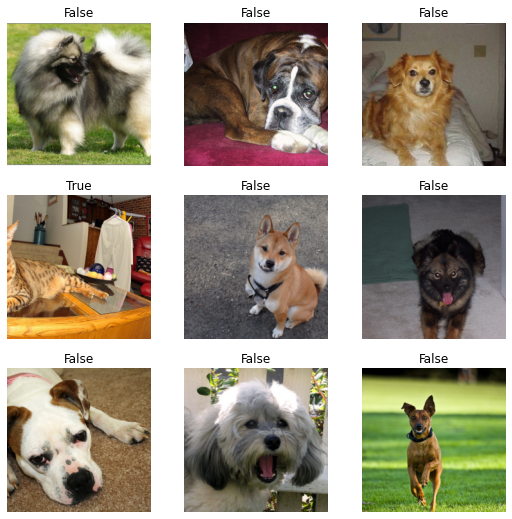

In [14]:
dls.show_batch()

In [78]:
# treinamento com a biblioteca FastAI
learn = cnn_learner(dls, resnet34, metrics=error_rate, normalize=True)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.151998,0.022169,0.008796,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.051471,0.010602,0.004736,01:31


In [79]:
# abaixo sequencia de testes da funcao loss_func

x,y = dls.valid.one_batch()

In [80]:
type(x), type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorCategory)

In [81]:
with torch.no_grad():
  learn.model.cuda()
  learn.eval()
  out = learn.model(x)

In [82]:
out[0]

TensorBase([ 7.4772, -8.1132], device='cuda:0')

In [83]:
learn.loss_func(out, y)

TensorBase(0.0005, device='cuda:0')

In [84]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [85]:
nn.CrossEntropyLoss()(out, y)

TensorCategory(0.0005, device='cuda:0')

In [86]:
out.argmax(dim=1)

TensorBase([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0], device='cuda:0')

In [87]:
# salvar modelo
import pickle

with open('pets_learn.pkl', 'wb') as file:
    pickle.dump(learn, file)

In [88]:
# carregar modelo salvo
with open('pets_learn.pkl', 'rb') as f:
    model = pickle.load(f)

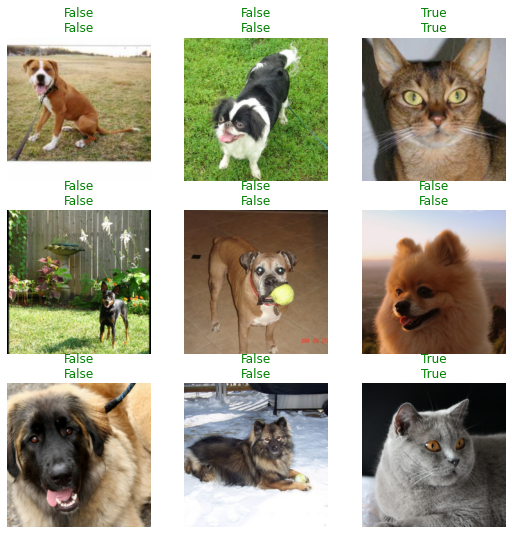

In [89]:
model.show_results()

In [90]:
# carrega os diretorios 

PATH = 'pets'
CATEGORIES = os.listdir(PATH)
NUM_CLASSES = len(CATEGORIES)

path_categories = [PATH +'/'+ CATEGORIES[i] for i in range(len(CATEGORIES))]
dir_categories = [ os.listdir(path_categories[i]) for i in range(len(path_categories))]

PETS = []
for i in range(len(path_categories)):
  PETS.append([path_categories[i] +'/'+ dir_categories[i][j] for j in range(len(dir_categories[i]))])

In [91]:
# exibe as categorias
path_categories

['pets/dog', 'pets/cat']

In [92]:
# realiza o teste com as imagens do diretorio com o modelo treinado
pred = []
target_ids = []
for i in range(len(PETS)):
  for j in range(len(PETS[i])):
    pred.append(learn.predict(PETS[i][j])) # predict : testar o treino realizado
    target_ids.append(i)

df_predict = pd.DataFrame(pred)
df_predict['target'] = [target_ids[i] for i in range(len(target_ids))]

df_predict

,0,1,2,target
0,False,TensorBase(0),"[TensorBase(0.8685), TensorBase(0.1315)]",0
1,False,TensorBase(0),"[TensorBase(1.0000), TensorBase(4.0140e-07)]",0
2,False,TensorBase(0),"[TensorBase(0.9999), TensorBase(6.2216e-05)]",0
3,False,TensorBase(0),"[TensorBase(1.0000), TensorBase(1.4810e-06)]",0
4,False,TensorBase(0),"[TensorBase(0.9964), TensorBase(0.0036)]",0
...,...,...,...,...
430,True,TensorBase(1),"[TensorBase(3.5251e-08), TensorBase(1.)]",1
431,True,TensorBase(1),"[TensorBase(2.5735e-15), TensorBase(1.)]",1
432,True,TensorBase(1),"[TensorBase(6.0229e-16), TensorBase(1.)]",1
433,True,TensorBase(1),"[TensorBase(5.2500e-14), TensorBase(1.)]",1


In [42]:
# tratamento dos dados do data frame df_predict 
map_label = {'False': 0, 'True': 1}
df_predict[0] = df_predict[0].map(map_label)
df_predict

,0,1,2,target
0,0,TensorBase(0),"[TensorBase(0.9993), TensorBase(0.0007)]",0
1,0,TensorBase(0),"[TensorBase(1.), TensorBase(1.9751e-08)]",0
2,0,TensorBase(0),"[TensorBase(0.9944), TensorBase(0.0056)]",0
3,0,TensorBase(0),"[TensorBase(1.0000), TensorBase(3.4437e-06)]",0
4,0,TensorBase(0),"[TensorBase(0.9999), TensorBase(9.2387e-05)]",0
...,...,...,...,...
430,1,TensorBase(1),"[TensorBase(3.2994e-05), TensorBase(1.0000)]",1
431,1,TensorBase(1),"[TensorBase(5.0866e-10), TensorBase(1.)]",1
432,1,TensorBase(1),"[TensorBase(2.5931e-12), TensorBase(1.)]",1
433,1,TensorBase(1),"[TensorBase(1.7740e-10), TensorBase(1.)]",1


In [47]:
# imports 
import seaborn as sb
import matplotlib.pyplot as plt
# matriz de confusao
def conf_matrix(df_pred:pd.DataFrame) -> pd.DataFrame:
  df_confusion = pd.crosstab(df_pred[0], df_pred['target'], rownames=['Predicted'], colnames=['Real'], margins=True)
  return df_confusion

result = conf_matrix(df_predict)
result

Real,0,1,All
Predicted,,,
0,202,9,211
1,13,211,224
All,215,220,435


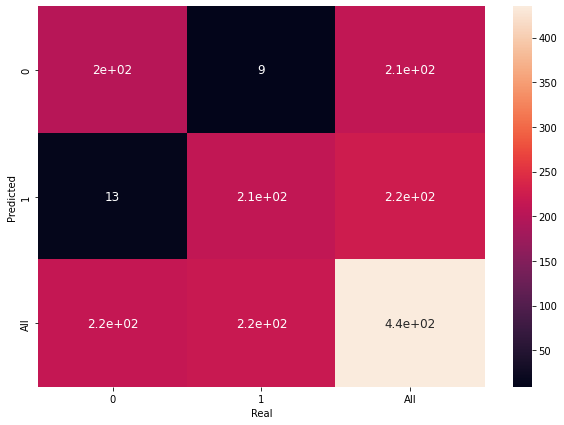

In [51]:
#plot matriz de confusao
result = conf_matrix(df_predict)
plt.figure(figsize=(10, 7))
sb.heatmap(result, annot=True, annot_kws={"size":12} )

In [49]:
# metrica geral
def acc_general(df_pred:pd.DataFrame, target:str) -> float:
  '''[Funcao Metrica Geral]

  Arguments:
      df_pred {[pd.DataFrame]} -- [DataFrame com os dados pedicted]

      target {[str]} -- [Nome do Classificador]
  Returns:
      [float] -- [Retorna o percentual de acuracia geral] 
  '''
  acertos = [df_pred.iloc[i][0] == df_pred.iloc[i][target] for i in range(len(df_pred))].count(True)
  general_acc = round((acertos/len(df_pred))*100,2) 
  return general_acc

accuracy_general = acc_general(df_predict, 'target')
print('Accuracy by General: ', accuracy_general ,'%')

Accuracy by General:  94.94 %
